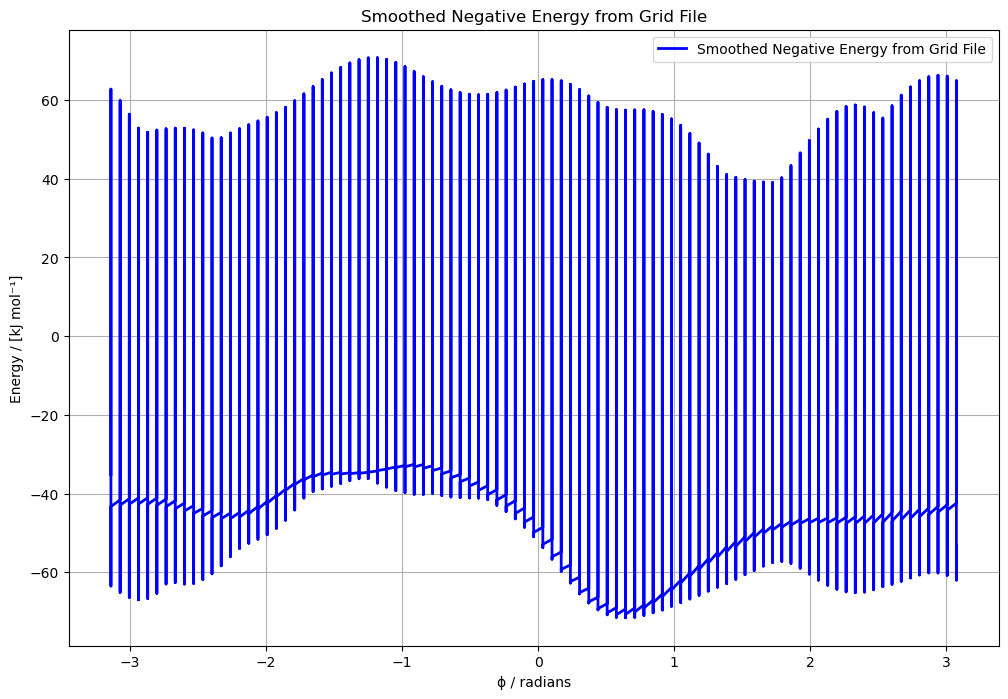

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Step 1: Load the grid file
grid_file = 'LoganoA.grid.dat'  # Update with your actual grid file name

# Read the file while skipping initial comment lines
with open(grid_file, 'r') as file:
    lines = file.readlines()

# Filter out lines that start with '#'
filtered_lines = [line for line in lines if not line.startswith('#')]

# Create a DataFrame from the filtered lines
grid_data = pd.read_csv(
    StringIO(''.join(filtered_lines)),  # Join the filtered lines into a single string
    delim_whitespace=True,
    header=None,  # No header in the data
    names=['phi', 'psi', 'energy', 'other_columns'],  # Adjust based on the actual columns in your grid file
)

# Step 2: Extract energy and smooth the data to reduce noise
negative_energy = -grid_data['energy'].to_numpy(dtype=float)  # Take the negative of the energy column

# Optional: Smoothing the data to remove noise (rolling average)
window_size = 10  # Adjust window size as needed for more or less smoothing
negative_energy_smooth = pd.Series(negative_energy).rolling(window=window_size, center=True).mean()

# Step 4: Plot the smoothed negative energy from the grid file
plt.figure(figsize=(12, 8))

# Plot the smoothed negative of the energy from the grid file with a solid line
plt.plot(grid_data['phi'], negative_energy_smooth, linestyle='-', color='blue', linewidth=2, label='Smoothed Negative Energy from Grid File')

# Customize the plot
plt.xlabel('ϕ / radians')
plt.ylabel('Energy / [kJ mol⁻¹]')
plt.title('Smoothed Negative Energy from Grid File')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
